Please upload the titanic.csv file


Saving Titanic-Dataset.csv to Titanic-Dataset (2).csv
First 5 rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            11380

/tmp/ipython-input-3-2511154541.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-3-2511154541.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

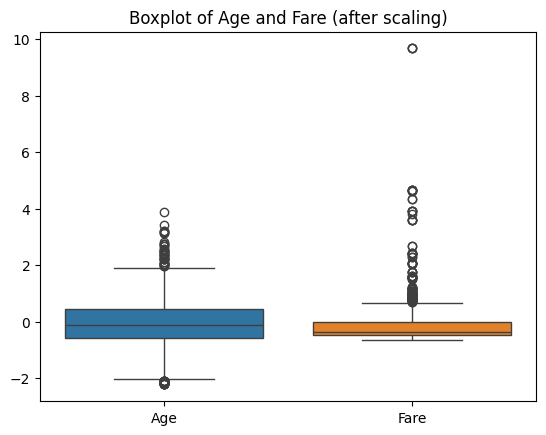

✅ Cleaned data saved as titanic_cleaned.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy import stats
from google.colab import files

# Step 1: Upload the dataset
print("Please upload the titanic.csv file")
uploaded = files.upload()

# Step 2: Load the dataset
df = pd.read_csv('Titanic-Dataset.csv')
print("First 5 rows of the dataset:")
print(df.head())

# Step 3: Explore the dataset
print("\nDataset info:")
print(df.info())

print("\nSummary statistics:")
print(df.describe())

print("\nMissing values:")
print(df.isnull().sum())

# Step 4: Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop('Cabin', axis=1, inplace=True)

# Step 5: Encode categorical features
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Step 6: Normalize numerical features
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

# Step 7: Visualize and remove outliers
print("\nBoxplots for Age and Fare:")
sns.boxplot(data=df[['Age', 'Fare']])
plt.title("Boxplot of Age and Fare (after scaling)")
plt.show()

# Remove outliers using Z-score
df = df[(np.abs(stats.zscore(df[['Age', 'Fare']])) < 3).all(axis=1)]

# Step 8: Save and download cleaned dataset
df.to_csv('titanic_cleaned.csv', index=False)
print("✅ Cleaned data saved as titanic_cleaned.csv")

# Download the file
files.download('titanic_cleaned.csv')


